<a href="https://colab.research.google.com/github/GoroCollins/machine-learning/blob/main/Week1_Coding_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
print(tf.__version__)

2.9.2


# The Sequential model API

 ## Coding tutorials
 #### [1. Building a Sequential model](#coding_tutorial_1)
 #### [2. Convolutional and pooling layers](#coding_tutorial_2)
 #### [3. The compile method](#coding_tutorial_3)
 #### [4. The fit method](#coding_tutorial_4)
 #### [5. The evaluate and predict methods](#coding_tutorial_5)

***
<a id="coding_tutorial_1"></a>
## Building a Sequential model

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

#### Build a feedforward neural network model

In [3]:
# Build the Sequential feedforward neural network model
model = Sequential([
    tf.keras.layers.Dense(units=16, input_shape=[1]),
    tf.keras.layers.Dense(1, activation=tf.nn.softmax)
])


In [4]:
# Print the model summary
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                32        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


***
<a id="coding_tutorial_2"></a>
## Convolutional and pooling layers

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

#### Build a convolutional neural network model

In [47]:
# Build the Sequential convolutional neural network model
model_c = Sequential([
    Conv2D(filters=32, kernel_size=3, activation=tf.nn.relu, padding='same', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=2, padding='same'),
    Conv2D(filters=64, kernel_size=3, activation=tf.nn.relu, padding='same'),
    MaxPooling2D(pool_size=2,padding='same'),
    Conv2D(filters=128, kernel_size=3, activation=tf.nn.relu, padding='same'),
    MaxPooling2D(pool_size=2, padding='same'),
    Flatten(),
    Dense(512, activation=tf.nn.relu),
    Dense(10, activation=tf.nn.softmax)
])


In [6]:
# Print the model summary

model_c.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 128)        0

***
<a id="coding_tutorial_3"></a>
## The compile method

#### Compile the model

In [48]:
# Define the model optimizer, loss function and metrics
model_c.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])


In [9]:
# Print the resulting model attributes
#model_c.weights


***
<a id="coding_tutorial_4"></a>
## The fit method

In [10]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Load the data

In [18]:
# Load the Fashion-MNIST dataset

fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [12]:
# Print the shape of the training data
train_images.shape


(60000, 28, 28)

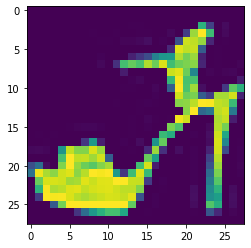

In [19]:
# Display one of the images
plt.imshow(train_images[9])


In [20]:
# Define the labels

labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

In [21]:
# Reshape the images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [22]:
# Rescale the image values so that they lie in between 0 and 1.
train_images = train_images/255.0 
test_images = test_images/255.0 


#### Fit the model

In [49]:
# Fit the model
history = model_c.fit(train_images, train_labels, epochs=50, verbose=2)


Epoch 1/50
1875/1875 - 6s - loss: 0.3953 - accuracy: 0.8534 - 6s/epoch - 3ms/step
Epoch 2/50
1875/1875 - 6s - loss: 0.2545 - accuracy: 0.9057 - 6s/epoch - 3ms/step
Epoch 3/50
1875/1875 - 5s - loss: 0.2111 - accuracy: 0.9211 - 5s/epoch - 3ms/step
Epoch 4/50
1875/1875 - 5s - loss: 0.1782 - accuracy: 0.9345 - 5s/epoch - 3ms/step
Epoch 5/50
1875/1875 - 5s - loss: 0.1515 - accuracy: 0.9425 - 5s/epoch - 3ms/step
Epoch 6/50
1875/1875 - 5s - loss: 0.1279 - accuracy: 0.9524 - 5s/epoch - 3ms/step
Epoch 7/50
1875/1875 - 5s - loss: 0.1061 - accuracy: 0.9601 - 5s/epoch - 3ms/step
Epoch 8/50
1875/1875 - 5s - loss: 0.0903 - accuracy: 0.9661 - 5s/epoch - 3ms/step
Epoch 9/50
1875/1875 - 5s - loss: 0.0774 - accuracy: 0.9703 - 5s/epoch - 3ms/step
Epoch 10/50
1875/1875 - 5s - loss: 0.0645 - accuracy: 0.9755 - 5s/epoch - 3ms/step
Epoch 11/50
1875/1875 - 5s - loss: 0.0585 - accuracy: 0.9777 - 5s/epoch - 3ms/step
Epoch 12/50
1875/1875 - 5s - loss: 0.0498 - accuracy: 0.9814 - 5s/epoch - 3ms/step
Epoch 13/50
1

#### Plot training history

In [50]:
# Load the history into a pandas Dataframe
history_dataframe = pd.DataFrame(history.history)
history_dataframe.head()


,loss,accuracy
0,0.395296,0.853417
1,0.254533,0.905750
2,0.211134,0.921067
3,0.178207,0.934500
4,0.151514,0.942517


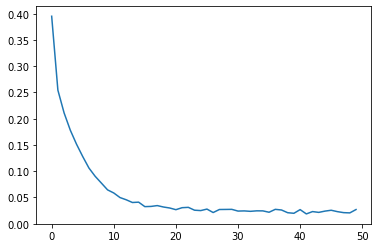

In [51]:
# Make a plot for the loss
plt.plot(history_dataframe['loss'])


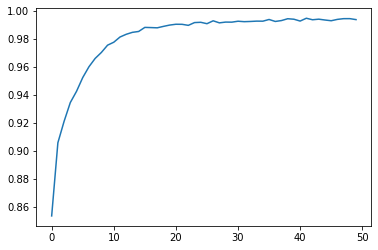

In [52]:
# Make a plot for the accuracy
plt.plot(history_dataframe['accuracy'])


In [ ]:
# Make a plot for the additional metric



***
<a id="coding_tutorial_5"></a>
## The evaluate and predict methods

In [53]:
import matplotlib.pyplot as plt
import numpy as np

#### Evaluate the model on the test set

In [54]:
# Evaluate the model
test_loss, test_accuracy = model_c.evaluate(test_images, test_labels)


313/313 [==============================] - 1s 3ms/step - loss: 1.0363 - accuracy: 0.9211


#### Make predictions from the model

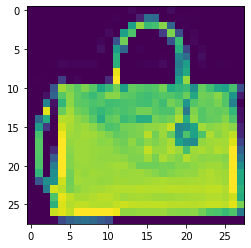

Label: Bag


In [55]:
# Choose a random test image

random_inx = np.random.choice(test_images.shape[0])
idx = 30
test_image = test_images[idx]
plt.imshow(test_image.reshape(28, 28))
plt.show()
print(f"Label: {labels[test_labels[idx]]}")

In [59]:
test_images[30].shape

(28, 28, 1)

In [60]:
# Get the model predictions
pred = model_c.predict(test_images)


313/313 [==============================] - 1s 2ms/step


In [63]:
print(f'The model\'s prediction for {labels[test_labels[idx]]} is {labels[np.argmax(pred[30])]}')

The model's prediction for Bag is Bag
